### 따릉이 데이터를 활용한 데이터 분석
   - 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요

- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.cluster import KMeans

In [92]:
train = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Practice/data/dacon_data/따릉이/submission.csv')

In [94]:
train.info()
train.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [95]:
experi = train.dropna(axis = 0) # 결측치 없는 애들 모으기

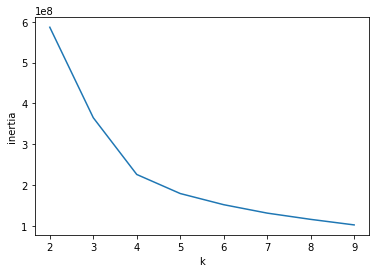

In [96]:
inertia = [] # 그래프가 가장 많이 꺾이는 부분 
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(experi)
    inertia.append(km.inertia_)
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [97]:
km = KMeans(n_clusters= 4, random_state=42)
km.fit(experi)

KMeans(n_clusters=4, random_state=42)

In [98]:
experi['cluster_id'] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


##### 피쳐의 요소가 전부 Nan 값인 특징을 가진 데이터를 뽑아내고 그 데이터의 최빈 값과  클러스터 0,1,2,3으로 묶은 값의 최빈 값들의 차의 합이 가장 작은 묶음 번호 찾기

In [100]:
features = ['hour_bef_temperature','hour_bef_precipitation',
            'hour_bef_windspeed','hour_bef_humidity',
            'hour_bef_visibility','hour_bef_ozone','hour_bef_pm10',
           'hour_bef_pm2.5']
arr = []
for i in features:
    x = train.copy()
    x = x[x[i].isnull()].mode()
    x = x.drop(i,axis = 1).iloc[0]
    x = x.fillna(0)
    middle = []
    for j in range(4):
        y = experi.copy()
        y = experi[experi['cluster_id']==j].mode()
        y = y.drop(i,axis = 1)
        y = y.drop('cluster_id',axis = 1).iloc[0]
        total = 0
        for a, b in zip(x,y):
            total += abs(a-b)
        middle.append([total,j,i])
    arr.append(min(middle))

In [101]:
arr

[[1485.016, 1, 'hour_bef_temperature'],
 [1498.4160000000002, 1, 'hour_bef_precipitation'],
 [217.405, 0, 'hour_bef_windspeed'],
 [1422.4160000000002, 1, 'hour_bef_humidity'],
 [499.736, 3, 'hour_bef_visibility'],
 [188.0, 0, 'hour_bef_ozone'],
 [199.005, 0, 'hour_bef_pm10'],
 [184.21800000000002, 0, 'hour_bef_pm2.5']]

In [111]:
experi[experi['cluster_id']==1].mode()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,cluster_id
0,1121,9.0,13.4,0.0,2.0,76.0,990.0,0.016,58.0,38.0,14.0,1.0
1,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN
2,1130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
268,2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
train['hour_bef_temperature'].fillna(13.4,inplace=True)
train['hour_bef_precipitation'].fillna(0.0,inplace=True)
train['hour_bef_windspeed'].fillna(2.0,inplace = True)
train['hour_bef_humidity'].fillna(76.0,inplace=True)
train['hour_bef_visibility'].fillna(2000.0,inplace=True)
train['hour_bef_ozone'].fillna(0.039,inplace=True)
train['hour_bef_pm10'].fillna(32.0,inplace=True)
train['hour_bef_pm2.5'].fillna(19.0,inplace=True)

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


id


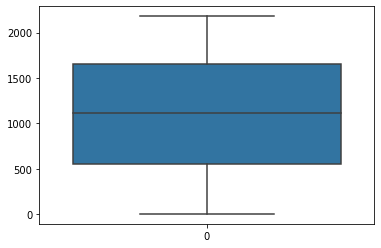

hour


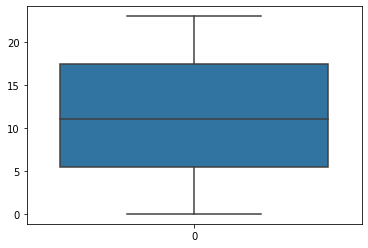

hour_bef_temperature


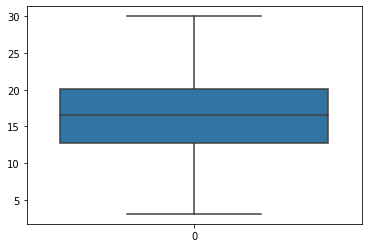

hour_bef_precipitation


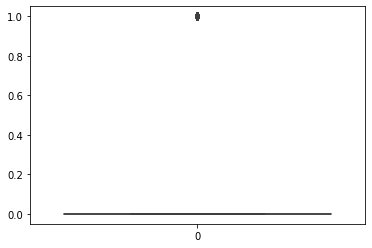

hour_bef_windspeed


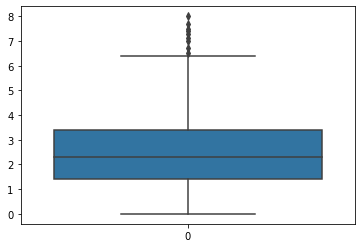

hour_bef_humidity


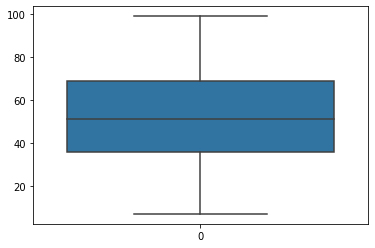

hour_bef_visibility


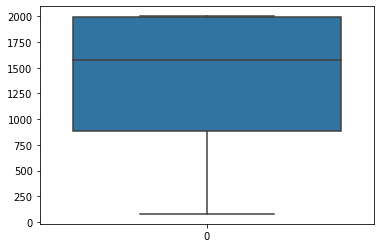

hour_bef_ozone


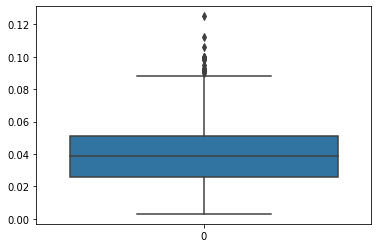

hour_bef_pm10


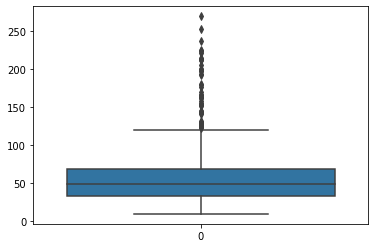

hour_bef_pm2.5


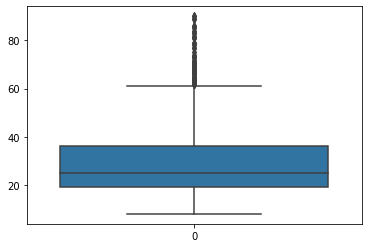

count


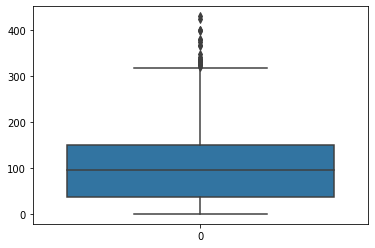

In [105]:
for idx, feature in enumerate(train) :
    print(feature)
    sns.boxplot(data = train[feature])
    plt.show()
    plt.close()

In [106]:
def outlier(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return data[(data < lower_bound) | (data > upper_bound)].index

In [107]:
outlier_index_hour_bef_windspeed = outlier(train.hour_bef_windspeed)
print(outlier_index_hour_bef_windspeed)
print(len(outlier_index_hour_bef_windspeed))
print()
outlier_index_hour_bef_ozone = outlier(train.hour_bef_ozone)
print(outlier_index_hour_bef_ozone)
print()
outlier_index_hour_bef_pm10 = outlier(train['hour_bef_pm10'])
print(outlier_index_hour_bef_pm10)
print()
outlier_index_hour_bef_pm2 = outlier(train['hour_bef_pm2.5'])
print(outlier_index_hour_bef_pm2)
print(len(outlier_index_hour_bef_pm2))
print()
outlier_index_count = outlier(train['count'])
print(outlier_index_count)
print()

Int64Index([141, 314, 325, 354, 369, 380, 831, 1118, 1293], dtype='int64')
9

Int64Index([ 117,  118,  292,  296,  362,  419,  501,  641,  675, 1008, 1107,
            1215, 1222, 1293, 1427, 1430],
           dtype='int64')

Int64Index([  20,   49,   62,  120,  137,  183,  233,  234,  241,  278,  280,
             287,  293,  343,  345,  349,  384,  413,  446,  453,  565,  574,
             603,  617,  622,  653,  680,  691,  818,  831,  837,  877,  879,
             905, 1010, 1041, 1059, 1061, 1066, 1099, 1118, 1155, 1197, 1214,
            1226, 1263, 1279, 1296, 1303, 1354, 1379, 1383],
           dtype='int64')

Int64Index([   3,   13,   29,   60,  105,  106,  111,  149,  179,  186,  196,
             197,  210,  229,  233,  237,  258,  285,  321,  365,  374,  377,
             428,  462,  468,  475,  483,  497,  511,  533,  574,  622,  644,
             678,  711,  792,  801,  802,  898,  899,  915,  924,  980,  986,
            1014, 1023, 1025, 1051, 1062, 1092, 1125, 1132, 11

In [108]:
from scipy.stats import skew
for i in train.columns:
    print('{}:{}'.format(i,skew(train[i]))) #hour_bef_precipitation (비 유,무)

id:-0.023425762918823995
hour:0.0036552757086815526
hour_bef_temperature:0.17727646358138585
hour_bef_precipitation:5.361897626045212
hour_bef_windspeed:0.566478374141825
hour_bef_humidity:0.14635482520239282
hour_bef_visibility:-0.4858136087755485
hour_bef_ozone:0.40885491377682187
hour_bef_pm10:2.4403675383757126
hour_bef_pm2.5:1.4681465978636812
count:0.9115952317125152


In [19]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.712886,0.031528,2.476080,52.263879,1406.032214,0.039141,55.616175,29.418780,108.563400
std,631.338681,6.922790,5.236995,0.174801,1.374517,20.375410,583.147280,0.018994,31.365265,14.442239,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,880.000000,0.026000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,69.000000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [109]:
x = train[['hour','hour_bef_temperature','hour_bef_precipitation',
         'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
         'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']]

y = train['count']

In [110]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
!pip install catboost
!pip install ngboost

In [23]:
import scipy.stats as ss # z-score 정규화 이상치에 덜 민감함

In [24]:
x_exp = ss.zscore(x[['hour','hour_bef_temperature',
         'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
         'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']])

In [25]:
x_exp = pd.DataFrame(x_exp, columns = ['hour','hour_bef_temperature',
         'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
         'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5'])

In [26]:
x_exp['hour_bef_precipitation'] = train['hour_bef_precipitation'] 

In [27]:
x_exp.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5', 'hour_bef_precipitation'],
      dtype='object')

In [79]:
x_exp

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_bef_precipitation
0,1.229190,-0.078867,-0.710369,1.803582,-1.423854,-0.639423,0.650108,0.248053,1.0
1,0.217691,0.646989,-0.783147,-0.209338,-0.840611,0.150561,0.554428,0.732909,0.0
2,-0.793809,-0.537302,-1.292591,1.312626,-0.041225,-0.323430,-0.753199,-0.721658,0.0
3,1.662690,-1.645188,0.162964,0.085236,-0.789149,0.045230,0.618215,2.395271,0.0
4,0.940191,2.442526,1.691298,-2.222257,1.018905,0.940545,-0.912665,-1.275778,0.0
...,...,...,...,...,...,...,...,...,...
1454,-1.082809,0.016640,-0.637591,0.036140,1.018905,-0.428761,-0.593732,-0.167537,0.0
1455,-1.227309,-1.129448,0.963520,-0.356624,1.018905,-0.007436,-0.689412,-0.721658,0.0
1456,-0.938309,0.303162,-0.419258,0.085236,1.018905,-1.587404,-0.816985,-0.583127,0.0
1457,1.373690,0.761597,0.890742,-0.749389,-0.018925,2.257184,0.490641,0.455849,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [80]:
target = test[['hour','hour_bef_temperature',
         'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
         'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']]
target = ss.zscore(target[['hour','hour_bef_temperature',
         'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
         'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']])
target = pd.DataFrame(target, columns = ['hour','hour_bef_temperature',
         'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
         'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5'])
target['hour_bef_precipitation'] = test['hour_bef_precipitation'] 

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [28]:
kfold = KFold(n_splits = 5)

In [85]:
### XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror',random_state = 518)

In [86]:
rmse_list = []
r2_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kfold.split(x_exp, y) :
    tr_x, tr_y = x_exp.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = x_exp.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = xgb.predict(val_x)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    r2 = r2_score(val_y,pred)
    r2_list.append(r2)

In [87]:
print(np.mean(rmse_list))
print(np.mean(r2_list))

39.823540086823904
0.7663063779250215


In [49]:
### LGBMRegressor
lgbm = LGBMRegressor(random_state = 518)

In [62]:
rmse_list = []
r2_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kfold.split(x_exp, y) :
    tr_x, tr_y = x_exp.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = x_exp.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = lgbm.predict(val_x)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    r2 = r2_score(val_y,pred)
    r2_list.append(r2)

In [63]:
print(np.mean(rmse_list))
print(np.mean(r2_list))

38.395290111265005
0.7827524858428869


In [58]:
#### CatBoost
cat = CatBoostRegressor(random_state = 518, silent = True)

In [65]:
rmse_list = []
r2_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kfold.split(x_exp, y) :
    tr_x, tr_y = x_exp.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = x_exp.iloc[val_idx], y.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = cat.predict(val_x)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    r2 = r2_score(val_y,pred)
    r2_list.append(r2)

In [66]:
print(np.mean(rmse_list))
print(np.mean(r2_list))

36.64073429318722
0.8022993451151672


In [83]:
### random forest
rf = RandomForestRegressor(random_state = 518)
rmse_list = []
r2_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kfold.split(x_exp, y) :
    tr_x, tr_y = x_exp.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = x_exp.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = rf.predict(val_x)
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    r2 = r2_score(val_y,pred)
    r2_list.append(r2)

In [84]:
print(np.mean(rmse_list))
print(np.mean(r2_list))

38.23282292299709
0.7850344471367707
